# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold



#Auto reload is used to ensure changes made to utils show up immediatly
%load_ext autoreload
%autoreload 2

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Task

From a data perspective, our objective is to analyze the provided used car dataset to identify the key features that significantly influence car prices. This involves formulating predictive models—specifically, using regression analysis( this a regression problem ) to model the relationship between car attributes (such as make, model, year, mileage, condition, and other relevant features) and their market prices. By applying statistical techniques and supervised machine learning algorithms, we aim to quantify the impact of each variable on the car's price, thus determining the primary factors that drive used car pricing.

#### Objectives
1. Understand the relationship between various features and used car market prices.
2. Build and evaluate multiple regression models to predict used car market prices.
3. Provide actionable insights based on model findings.

### Data Dictionary

The dataset contains details about car listings across various regions, including attributes like price, condition, and specifications.

1. **id**: Unique identifier for each listing.

2. **region**: The region where the listing is located, generally represented as a city or metropolitan area.

3. **price**: The price of the car in USD.

4. **year**: The manufacturing year of the vehicle.

5. **manufacturer**: The manufacturer or brand of the vehicle (e.g., Ford, Toyota).

6. **model**: The specific model of the car (e.g., Camry, Civic).

7. **condition**: The condition of the car as specified by the seller (e.g., new, like new, excellent, good, fair, salvage).

8. **cylinders**: The number of cylinders in the engine (e.g., 4-cylinder, 6-cylinder).

9. **fuel**: The type of fuel the car uses (e.g., gasoline, diesel, electric, hybrid).

10. **odometer**: The mileage of the vehicle, recorded in miles.

11. **title_status**: The status of the vehicle's title (e.g., clean, salvage, rebuilt, lien).

12. **transmission**: The type of transmission the vehicle has (e.g., automatic, manual, other).

13. **VIN**: Vehicle Identification Number, a unique code used to identify individual motor vehicles.

14. **drive**: The type of drivetrain (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).

15. **size**: The size category of the vehicle (e.g., compact, mid-size, full-size).

16. **type**: The body type of the car (e.g., sedan, SUV, truck, coupe).

17. **paint_color**: The color of the vehicle's exterior paint.

18. **state**: The state where the listing originates from, represented as a two-letter abbreviation (e.g., CA, NY).


In [3]:
# Load the dataset
vehicles_df = pd.read_csv('data/vehicles.csv')

In [4]:
# Display the last few rows of the dataset because the first few rows are not usefule
print("\nLast few rows of the dataset:")
vehicles_df.tail()


Last few rows of the dataset:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To get familiar with the dataset and identify potential quality issues, I would take the following steps:

To get familiar with the dataset and identify potential quality issues, I would take the following steps:
1. Display basic information about the dataset
2. Display descriptive statistics
3. Check for missing values
4. Visualize the distribution of the target variable (price)
5. Create box plots to detect outliers of target variable (price)
6. Visualize correlations between features
7. Create histograms for certain features to understand their distribution
8. Analyze the relationship between categorical features and the target variable
9. Check for data consistency and integrity
10. Explore the geographical distribution of listings



In [5]:

#1. Display basic information about the dataset
print("Dataset info:")
vehicles_df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  obj

In [6]:

# Display descriptive statistics
print("\nSummary statistics of features:")
vehicles_df.describe()



Summary statistics of features:


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
from utils import analyze_missing_values
analyze_missing_values(vehicles_df)



Missing Values Analysis:
Feature                #Missing   %Missing
---------------------------------------------
id                            0       0.00%
region                        0       0.00%
price                         0       0.00%
year                       1205       0.28%
manufacturer              17646       4.13%
model                      5277       1.24%
condition                174104      40.79%
cylinders                177678      41.62%
fuel                       3013       0.71%
odometer                   4400       1.03%
title_status               8242       1.93%
transmission               2556       0.60%
VIN                      161042      37.73%
drive                    130567      30.59%
size                     306361      71.77%
type                      92858      21.75%
paint_color              130203      30.50%
state                         0       0.00%


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


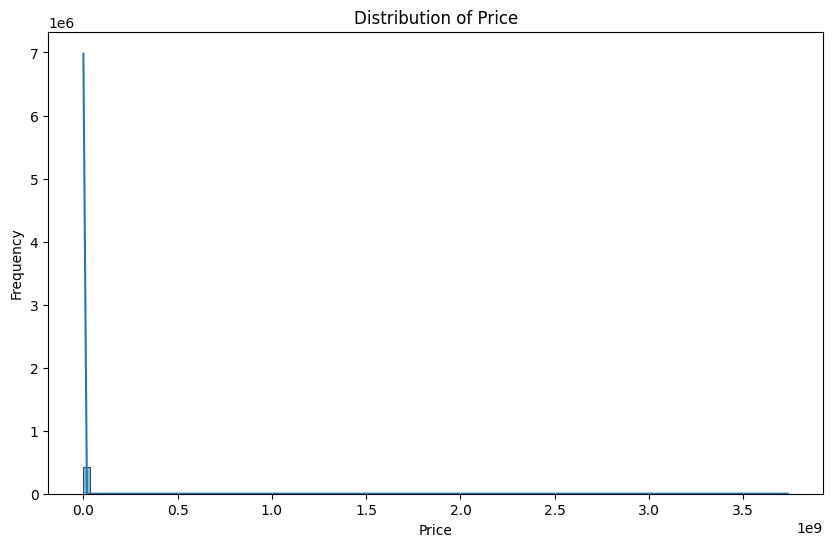

In [8]:
#Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_df['price'].dropna(), bins=100, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


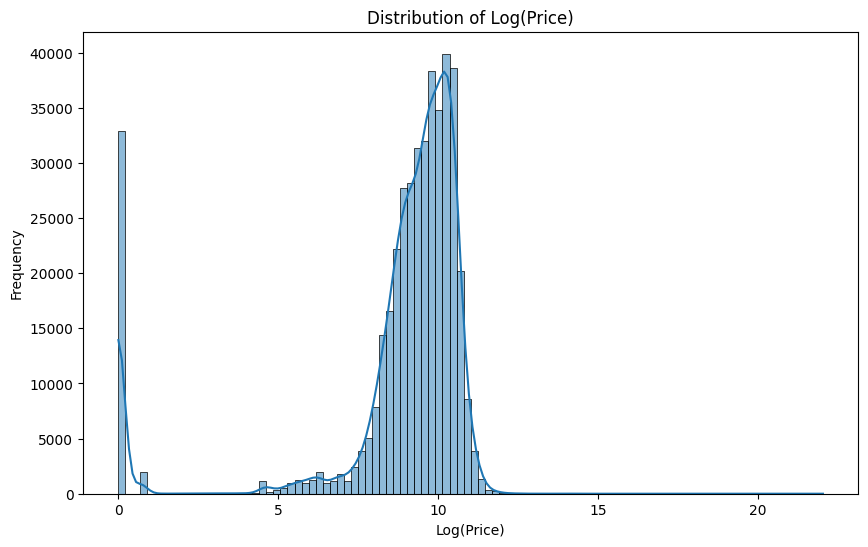

Number of vehicles with zero price: 32895
Percentage of vehicles with zero price: 7.71%


In [9]:
#We see that the data is skewed to the left, and does not appear to be nomrally distributed. This is better seen by plotting the log of the price.
# Plot the log of price
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(vehicles_df['price'].dropna()), bins=100, kde=True)
plt.title('Distribution of Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

# Count the number of zeros in the price column
zero_price_count = (vehicles_df['price'] == 0).sum()

print(f"Number of vehicles with zero price: {zero_price_count}")

# Calculate the percentage of zero prices
zero_price_percentage = (zero_price_count / len(vehicles_df)) * 100

print(f"Percentage of vehicles with zero price: {zero_price_percentage:.2f}%")


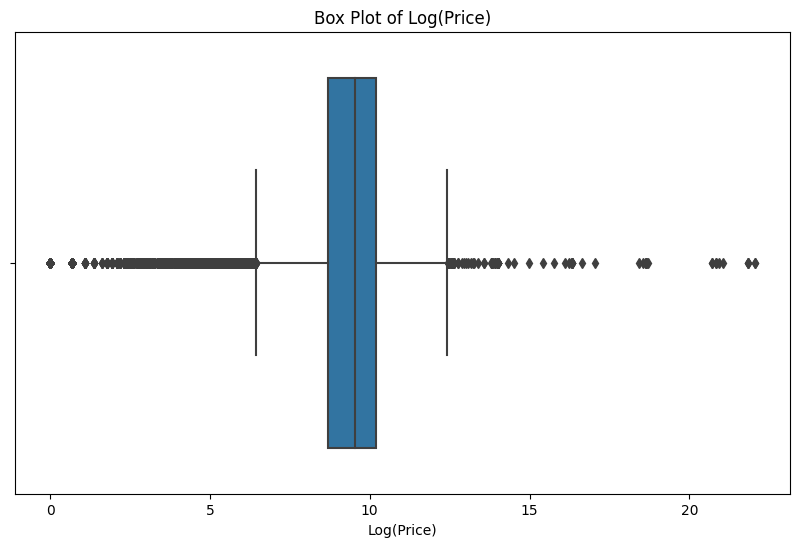

In [10]:
#Create a log box plot of price
plt.figure(figsize=(10, 6))
sns.boxplot(x=np.log1p(vehicles_df['price'].dropna()))
plt.title('Box Plot of Log(Price)')
plt.xlabel('Log(Price)')
plt.show()


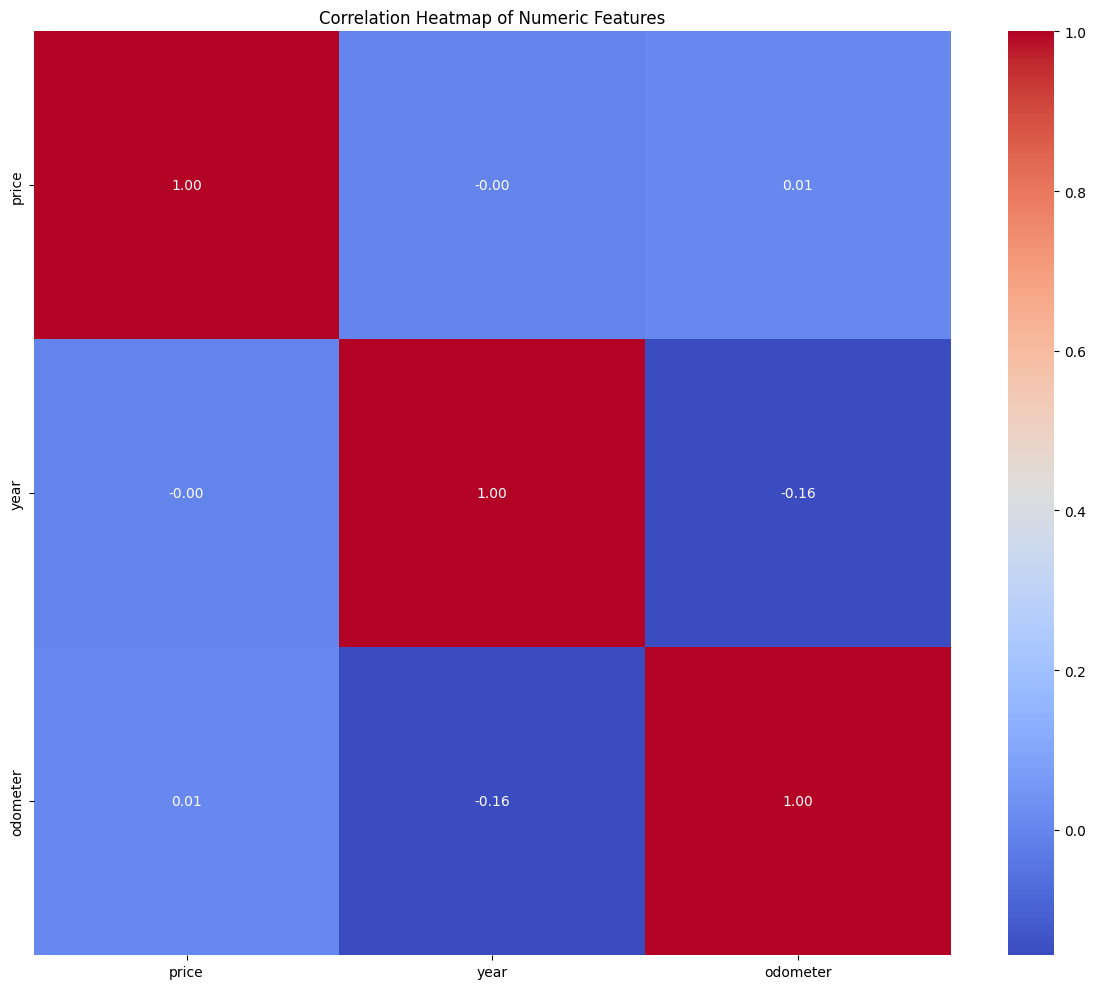

In [11]:

# Get all numeric columns in a new dataframe
numeric_df = vehicles_df.select_dtypes(include=['int64', 'float64'])
numeric_df = numeric_df.drop('id', axis=1, errors='ignore')

# Plot correlation map for numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


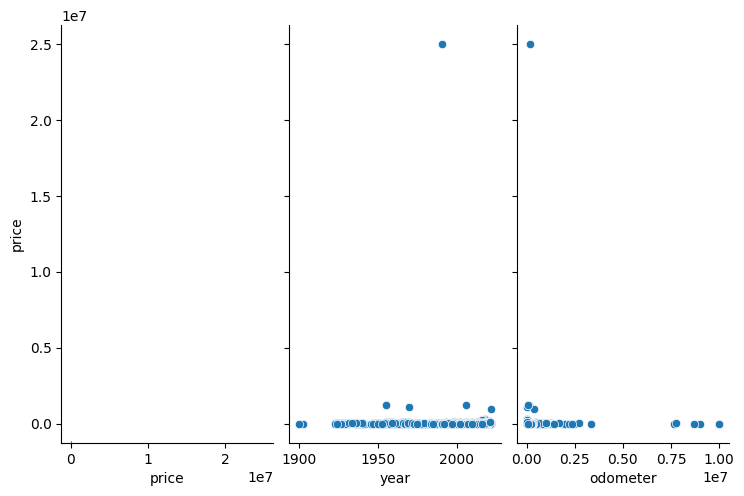

In [12]:
# Visualize relationships between features and price( Leverage a reduced sample of the data to reduce time it takes to render)
vehicles_sample_df = vehicles_df.sample(n=30000, random_state=42)
sns.pairplot(vehicles_sample_df, x_vars=numeric_df.columns, y_vars='price', height=5, aspect=0.5)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/wf/ftxcns9s2cdc0_lzmnf9bvqc0000gn/T/ipykernel_18804/1465838337.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xti

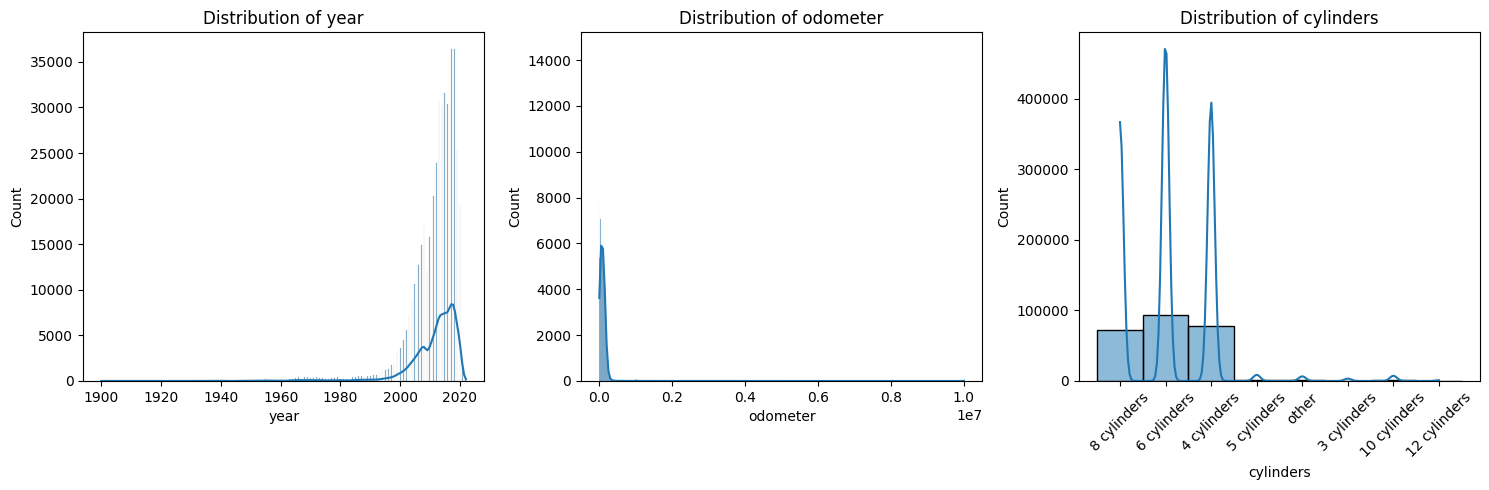

In [13]:
# Create histograms for certain features to understand their distribution
features_to_plot = ['year', 'odometer', 'cylinders']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(features_to_plot):
    # Replace inf values with NaN before plotting
    data = vehicles_df[feature].replace([np.inf, -np.inf], np.nan).dropna()
    sns.histplot(data, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    if feature == 'cylinders':
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

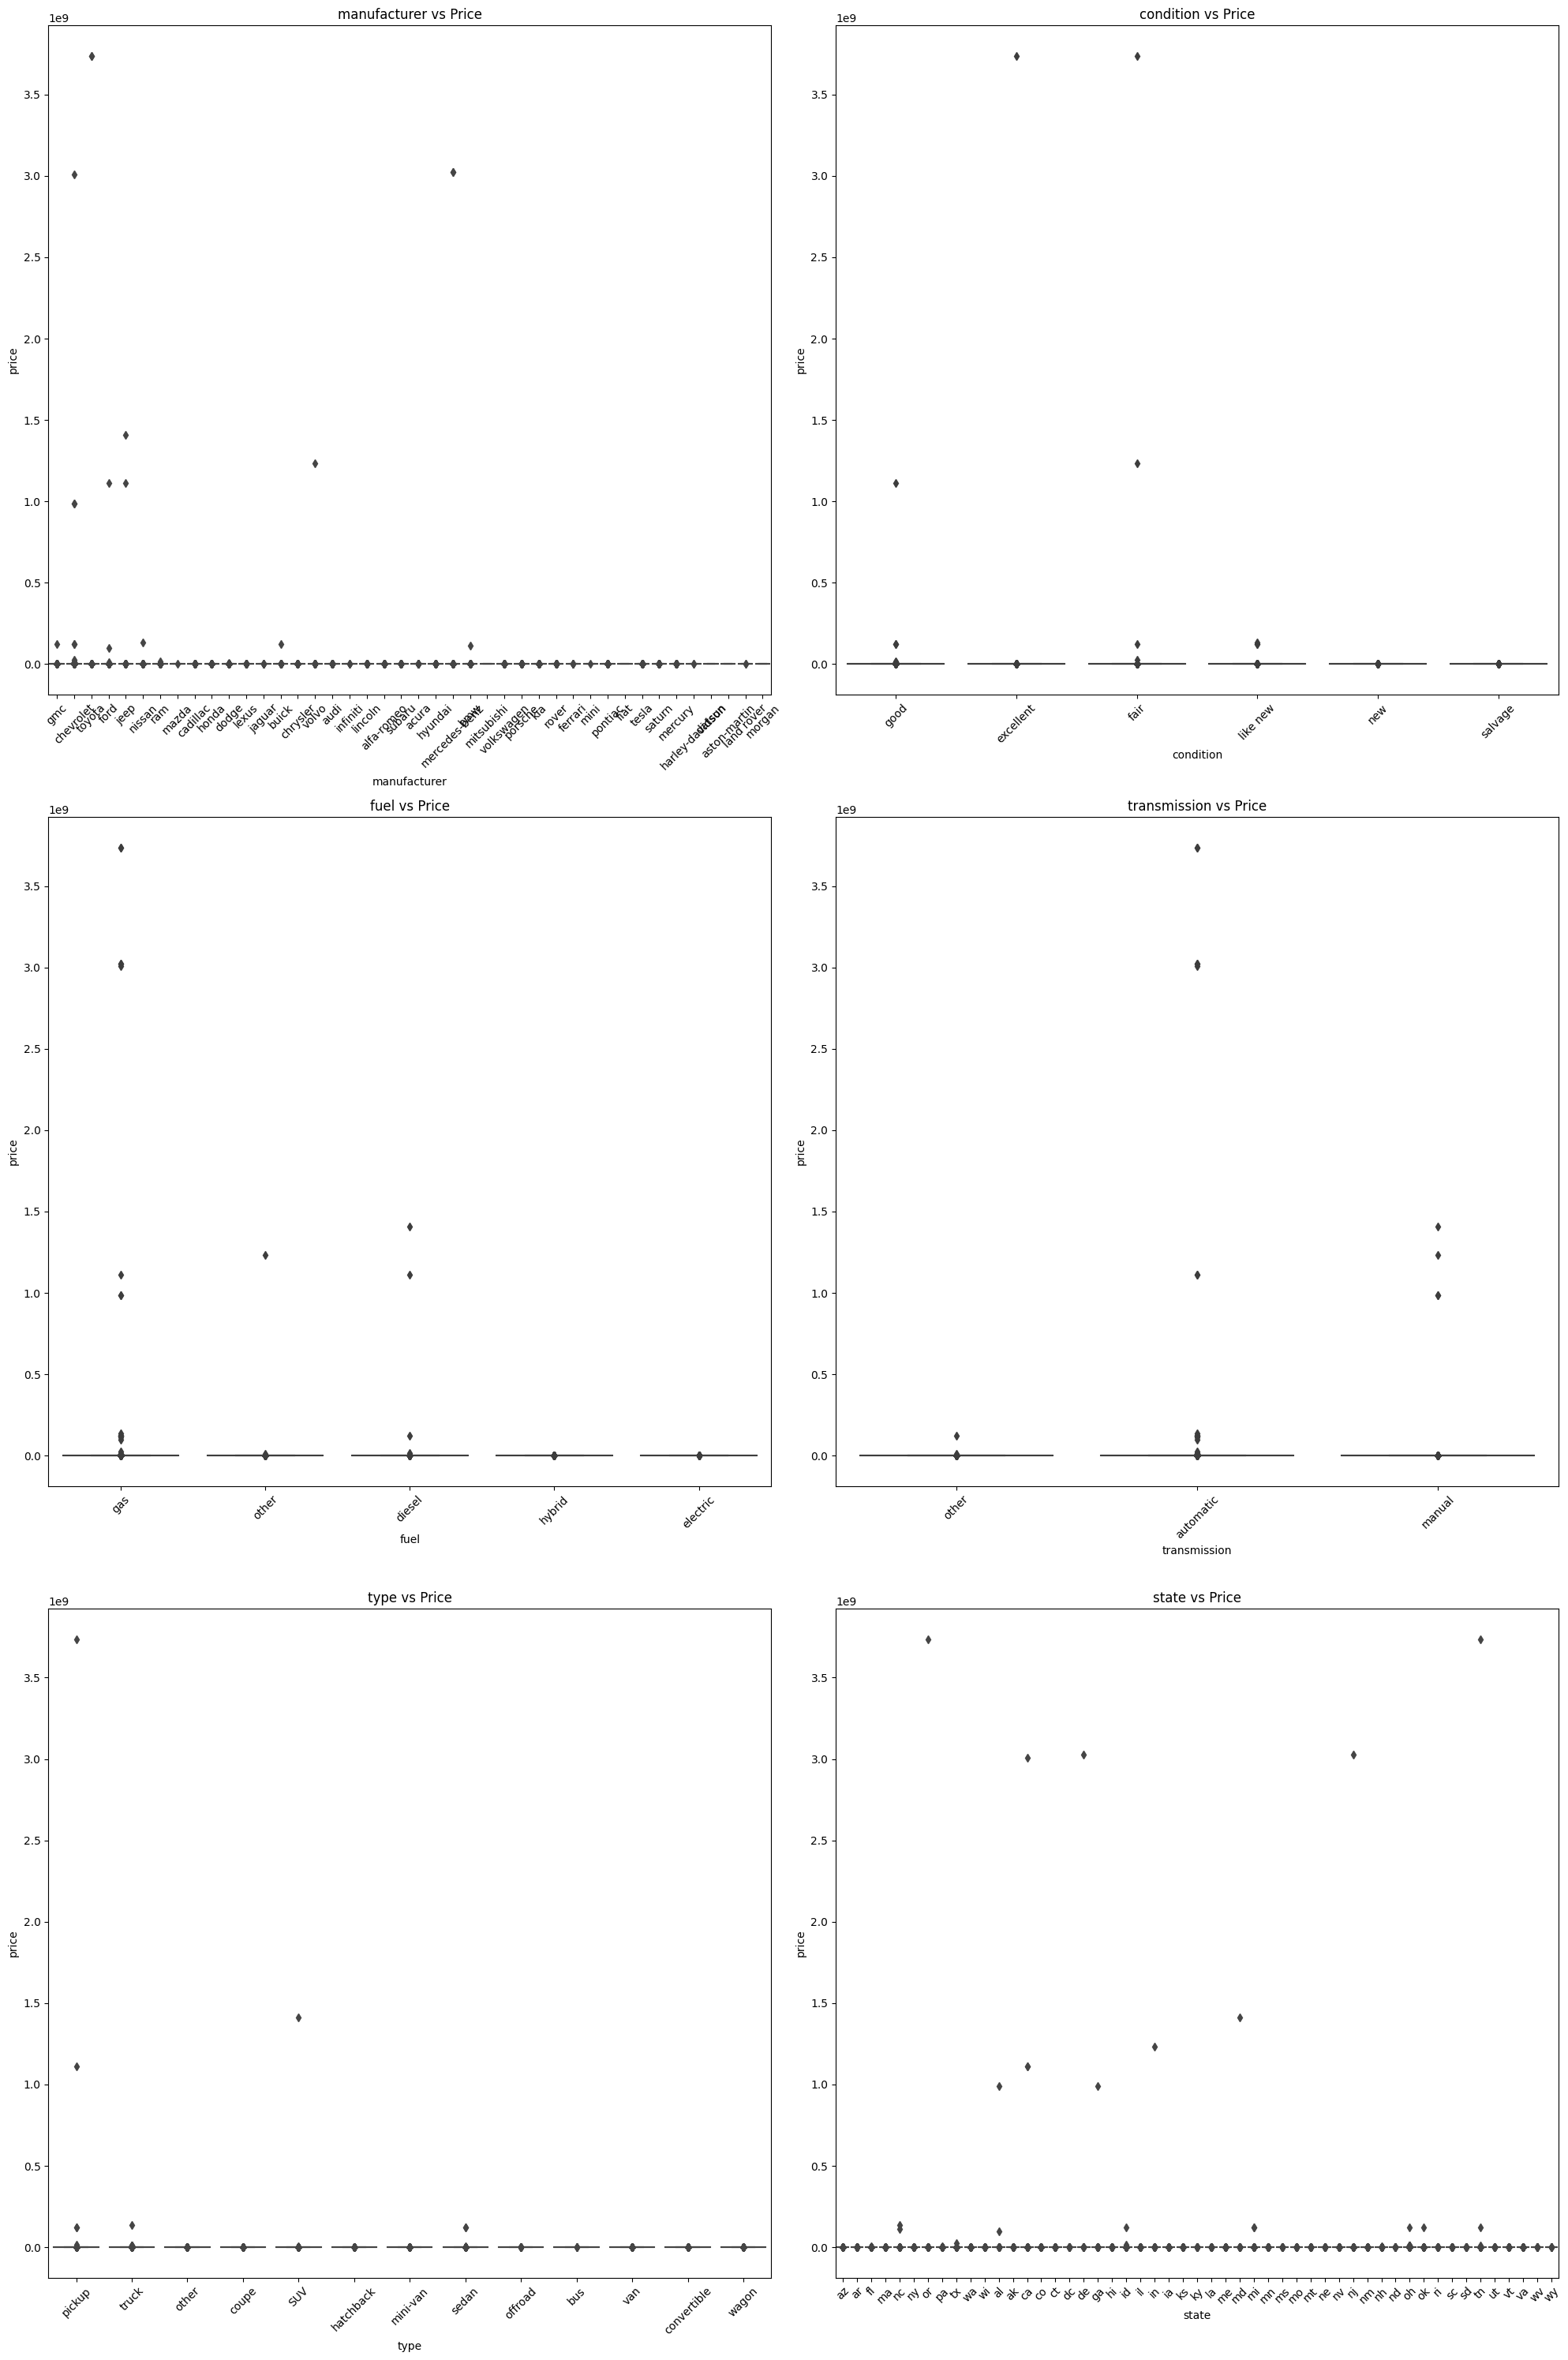

In [14]:
# 10. Analyze the relationship between categorical features and the target variable
categorical_features = ['manufacturer', 'condition', 'fuel', 'transmission', 'type', 'state']
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
for i, feature in enumerate(categorical_features):
    # Drop null values for both the feature and price
    data = vehicles_df.dropna(subset=[feature, 'price'])
    sns.boxplot(x=feature, y='price', data=data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} vs Price')
    axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Check uniuqe values in categorical columns to determine if
print("\nUnique values in categorical columns:")
for column in vehicles_df.select_dtypes(include=['object']).columns:
    print(f"{column}: {vehicles_df[column].nunique()}")


Unique values in categorical columns:
region: 404
manufacturer: 42
model: 29649
condition: 6
cylinders: 8
fuel: 5
title_status: 6
transmission: 3
VIN: 118246
drive: 3
size: 4
type: 13
paint_color: 12
state: 51


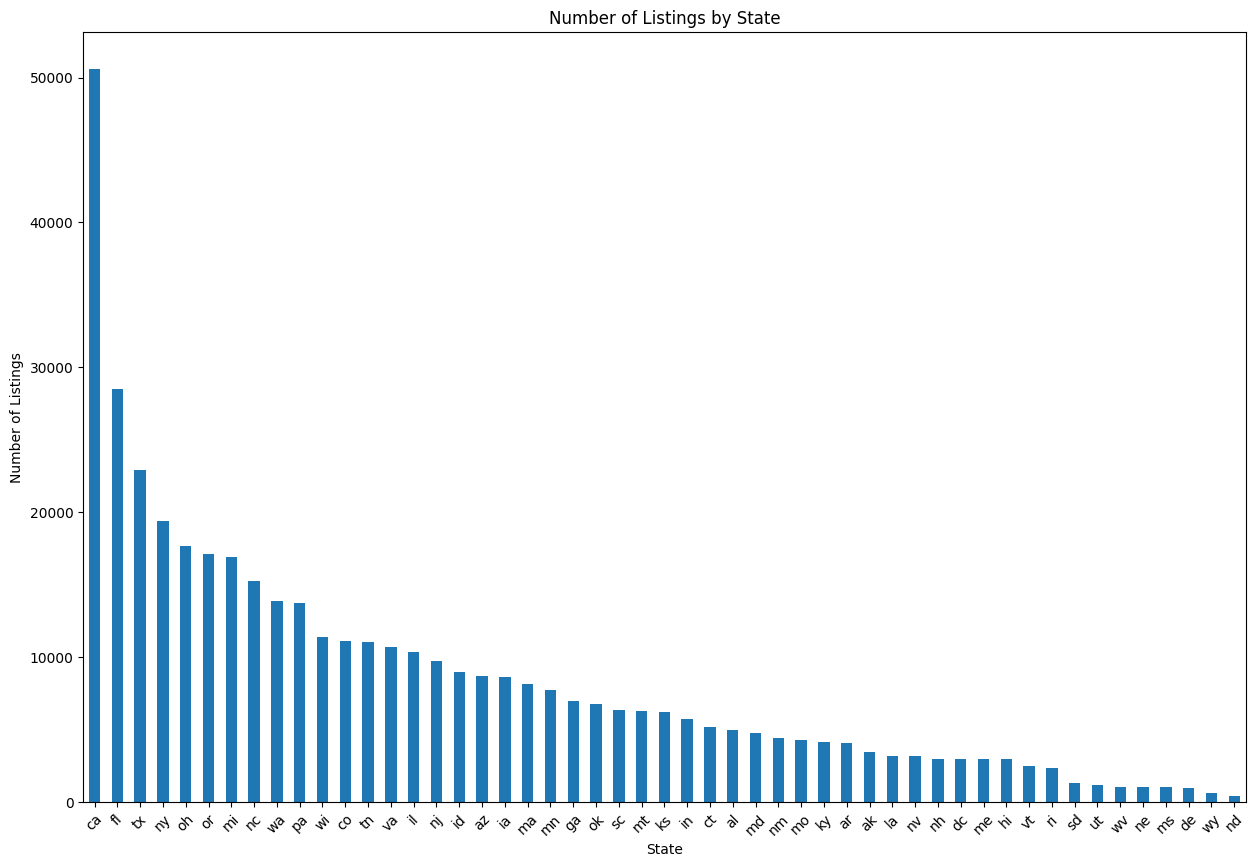

In [16]:

# Explore the geographical distribution of listings
plt.figure(figsize=(15, 10))
vehicles_df['state'].value_counts().plot(kind='bar')
plt.title('Number of Listings by State')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Create a histogram with manufacturer
manufacturer_counts = vehicles_df['manufacturer'].dropna().value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer', 'count']

fig = px.bar(manufacturer_counts, x='manufacturer', y='count', title='Histogram of Manufacturer')
fig.update_layout(xaxis_title='Manufacturer', yaxis_title='Frequency', xaxis_tickangle=-45)
fig.show()

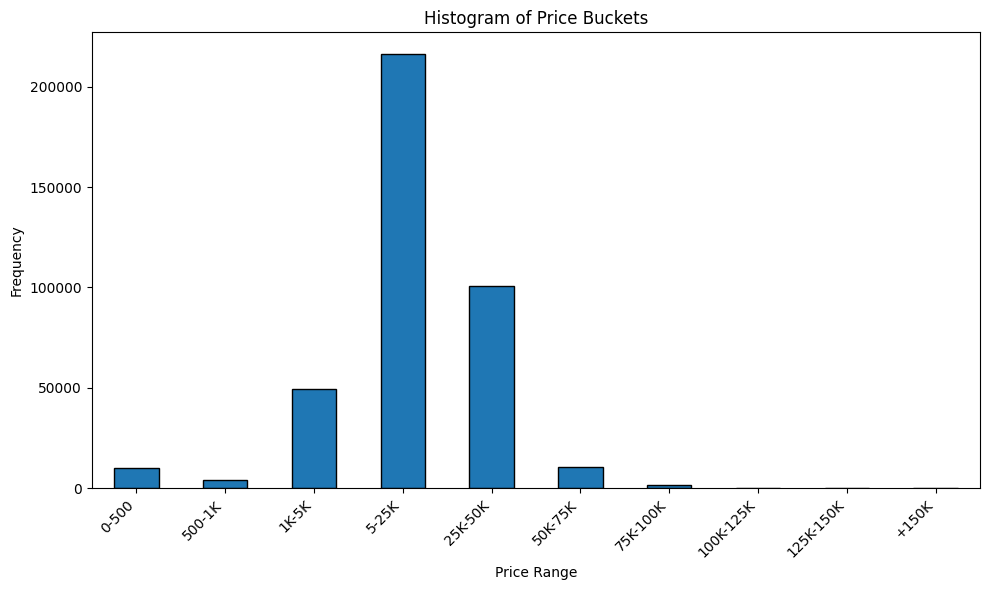

In [18]:
# Create a histogram of prices
bins = [0, 500, 1000, 5000, 25000, 50000, 75000, 100000, 125000, 150000, 1_000_000]
labels = ['0-500','500-1K', '1K-5K', '5-25K', '25K-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K', '+150K']

# Create a new column 'price_bucket' based on the defined bins
price_bucket= pd.cut(vehicles_df['price'], bins=bins, labels=labels)

# Create the histogram based on the 'price_bucket' column
plt.figure(figsize=(10, 6))
price_bucket.value_counts(sort=False).plot(kind='bar', edgecolor='black')
plt.title('Histogram of Price Buckets')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Data Cleaning


In this section, we performed data cleaning and preparation to ensure the dataset is ready for modeling. The steps taken include:
 
1. Converted the 'year' column to 'age' by subtracting the manufacturing year from the current year.
2. Selected columns that are important and do not have a large amount of missing values.
3. Dropped rows with null values in the selected columns.
4. Removed rows with outliers in the 'price' column.
5. Ensured there are no missing values in the cleaned dataset.


In [19]:
from utils import drop_outliers


#convert year to age by subtracting the manufacturing year from the current year
vehicles_df['age'] = 2024 - vehicles_df['year']

# Select only the columns that seem important, and do not large amount of missing values
selected_columns = [
    'price', 'age', 'manufacturer', 'title_status', 'odometer',
    'state', 'fuel', 'transmission','condition','type'
]
vehicles_df_selected = vehicles_df[selected_columns].copy()

# Replace nulls or empty values in 'condition' and 'type' with "unknown"
vehicles_df_selected['condition'].fillna('unknown', inplace=True)
vehicles_df_selected['type'].fillna('other', inplace=True)

#drop the nulls values in the selected columns
vehicles_df_selected.dropna(inplace=True)

#remove rows with astronomically high values/outliers
vehicles_df_reduced = drop_outliers(
    vehicles_df_selected, 
    'price', 
    1000, 
    75_000
)

#Make sure there are no missing values
analyze_missing_values(vehicles_df_reduced)

#get unique values in categorical columns
unique_values_dict = {}
for column in vehicles_df_reduced.select_dtypes(include=['object']).columns:
    unique_values_dict[column] = vehicles_df_reduced[column].unique().tolist()

print("\nUnique values in categorical columns:")
for column, unique_values in unique_values_dict.items():
    print(f"{column}: {unique_values}")




Missing Values Analysis:
Feature                #Missing   %Missing
---------------------------------------------
price                         0       0.00%
age                           0       0.00%
manufacturer                  0       0.00%
title_status                  0       0.00%
odometer                      0       0.00%
state                         0       0.00%
fuel                          0       0.00%
transmission                  0       0.00%
condition                     0       0.00%
type                          0       0.00%

Unique values in categorical columns:
manufacturer: ['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'mini', 'pontiac', 'fiat', 'tesla', 'mercury', 'saturn', 'harley-davidson', 'datsun', 

In [20]:
# Get count of 'other' for 'fuel' and 'transmission'
fuel_other_count = vehicles_df_reduced[vehicles_df_reduced['fuel'] == 'other'].shape[0]
transmission_other_count = vehicles_df_reduced[vehicles_df_reduced['transmission'] == 'other'].shape[0]

print(f"Count of 'other' in 'fuel': {fuel_other_count}")
print(f"Count of 'other' in 'transmission': {transmission_other_count}")


Count of 'other' in 'fuel': 25982
Count of 'other' in 'transmission': 57961


#### Split dataset into train, test

In [21]:
X = vehicles_df_reduced.drop('price', axis=1)
y = vehicles_df_reduced['price']  #log transform the target variable to reduce skewness

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature Engineering

ordinal_encode(,['unknown', 'salvage', 'fair', 'good', 'like new', 'excellent', 'new'])

In [22]:
from utils import uniques

print('ugg')

# Define the preprocessor for numerical and categorical features

# Define the order for the title_status and condition columns
title_status_order = ['missing', 'parts only', 'salvage', 'lien', 'rebuilt', 'clean']
condition_order = ['unknown', 'salvage', 'fair', 'good', 'like new', 'excellent', 'new']
categorical_features = ['manufacturer', 'fuel', 'transmission', 'type', 'state']
unique_vals = uniques(vehicles_df_reduced, categorical_features)
#Create the preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'odometer']),
        ('cat', OneHotEncoder(categories=unique_vals), categorical_features),
        ('ord', OrdinalEncoder(categories=[title_status_order, condition_order]), ['title_status','condition']),
    ]
)



ugg


In [23]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

In [24]:
results = {}
for name, model in models.items():
    # Create a pipeline that includes the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")



Linear Regression: RMSE = 9961.5349, R2 = 0.4642
Ridge Regression: RMSE = 9960.2648, R2 = 0.4643
Lasso Regression: RMSE = 9960.9606, R2 = 0.4643
Elastic Net Regression: RMSE = 11551.6599, R2 = 0.2795


Linear Regression, Ridge Regression, and Lasso Regression all exhibit very similar performance, with **RMSE values around 9960** and **R² values of approximately 0.464**, indicating that they explain about **46% of the variance** in the target variable. The small differences in their metrics suggest that any of these models could be suitable for this dataset. However, Ridge and Lasso offer the added benefit of regularization, which may help prevent overfitting in cases with many features or multicollinearity. Elastic Net Regression, on the other hand, performed significantly worse, with a **higher RMSE (11551.66)** and a **lower R² (0.2795)**, making it the **least suitable model** for this dataset.


In [25]:
# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    print(f"name: {name}")
    
    # Create pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, model)])

    if name in param_grid:
        # Dynamically prefix the parameters for the current model
        search_params = {f'{name}__{key}': value for key, value in param_grid[name].items()}
        
        # Perform grid search for models with hyperparameters
        grid = GridSearchCV(pipeline, search_params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        
        # Save the best estimator (pipeline) from grid search
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression or other models without hyperparameters, perform cross-validation
        scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")
        
        # After cross-validation, fit the model and save it in best_models
        pipeline.fit(X_train, y_train)
        best_models[name] = pipeline

# Evaluate the best models on the test set
print('')
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    # Make predictions with the fitted model
    y_pred = model.predict(X_test)
    
    # Calculate the error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")


name: Linear Regression


NameError: name 'param_grid' is not defined

Last Run( 1.13 mins)
Linear Regression: Cross-validation RMSE = 9917.0474
Ridge: Cross-validation RMSE = 9916.8607
Lasso: Cross-validation RMSE = 9918.3101
ElasticNet: Cross-validation RMSE = 11824.6887

Evaluate the best models on the test set
Linear Regression: RMSE = 9961.5347, R2 = 0.4642
Ridge: RMSE = 9960.1928, R2 = 0.4644
Lasso: RMSE = 9961.0290, R2 = 0.4643
ElasticNet: RMSE = 11835.6642, R2 = 0.2436

In [ ]:
Linear Regression: RMSE = 9961.5337, R2 = 0.4642
Ridge Regression: RMSE = 9960.2745, R2 = 0.4643
Lasso Regression: RMSE = 9960.9603, R2 = 0.4643
Elastic Net Regression: RMSE = 11551.6595, R2 = 0.2795

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the order for the title_status and condition columns
title_status_order = ['missing', 'parts only', 'salvage', 'lien', 'rebuilt', 'clean']
condition_order = ['unknown', 'salvage', 'fair', 'good', 'like new', 'excellent', 'new']

# Create the preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'odometer']),
        ('cat', OneHotEncoder(categories=unique_vals, drop='first', handle_unknown='ignore'), 
         ['manufacturer', 'fuel', 'transmission', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[title_status_order, condition_order]), 
         ['title_status', 'condition']),
    ]
)

# Define the parameter grid for each model, with polynomial degrees
param_grid = {
    'Ridge': {
        'poly__degree': [1, 2, 3, 4],
        'Ridge__alpha': [0.1, 1.0, 10.0, 100.0]
    },
    'Lasso': {
        'poly__degree': [1, 2, 3, 4],
        'Lasso__alpha': [0.01, 0.1, 1.0, 10.0]
    },
    'ElasticNet': {
        'poly__degree': [1, 2, 3, 4],
        'ElasticNet__alpha': [0.01, 0.1, 1.0, 10.0],
        'ElasticNet__l1_ratio': [0.1, 0.5, 0.7, 0.9]
    }
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    print(f"name: {name}")
    
    # Create pipeline with the preprocessor, polynomial features, and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures()),  # Add polynomial features
        (name, model)
    ])

    # Check if the model has hyperparameters in the param_grid
    if name in param_grid:
        # Dynamically create the search_params by adding the prefix
        search_params = {f'{name}__{key}': value for key, value in param_grid[name].items()}
        
        # Perform grid search for models with hyperparameters
        grid = GridSearchCV(pipeline, search_params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        
        # Save the best estimator (pipeline) from grid search
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For models without hyperparameters, perform cross-validation
        scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")
        
        # After cross-validation, fit the model and save it in best_models
        pipeline.fit(X_train, y_train)
        best_models[name] = pipeline

# Evaluate the best models on the test set
print('')
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    # Make predictions with the fitted model
    y_pred = model.predict(X_test)
    
    # Calculate the error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")


name: Linear Regression
Linear Regression: Cross-validation RMSE = 7547.6358
name: Ridge


ValueError: Invalid parameter 'Ridge' for estimator Ridge(). Valid parameters are: ['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'random_state', 'solver', 'tol'].

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the order for the title_status and condition columns
title_status_order = ['missing', 'parts only', 'salvage', 'lien', 'rebuilt', 'clean']
condition_order = ['unknown', 'salvage', 'fair', 'good', 'like new', 'excellent', 'new']

# Create the preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'odometer']),
        ('cat', OneHotEncoder(categories=unique_vals, drop='first', handle_unknown='ignore'), 
         ['manufacturer', 'fuel', 'transmission', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[title_status_order, condition_order]), 
         ['title_status', 'condition']),
    ]
)

# Pipeline placeholder for different models
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),   # Add polynomial features
    ('model', LinearRegression())      # Placeholder for the model, will be overwritten in GridSearchCV
])

# Define the parameter grid with multiple models
param_grid = [
    {
        'poly__degree': [1, 2,3],  # Polynomial degrees to search over
        'model': [LinearRegression()]  # No hyperparameters for Linear Regression
    },
    {
        'poly__degree': [1, 2],  
        'model': [Ridge()],
        'model__alpha': [0.1, 1.0, 10.0, 100.0]  # Hyperparameters for Ridge
    },
]

# Use GridSearchCV to perform the search over both the model and the hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
best_rmse = np.sqrt(-grid_search.best_score_)

# Print best parameters and the best RMSE
print(f"Best Model: {grid_search.best_params_}")
print(f"Best RMSE: {best_rmse:.4f}")

# Evaluate on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}, R2: {r2:.4f}")


Best Model: {'model': Ridge(alpha=100.0), 'model__alpha': 100.0, 'poly__degree': 2}
Best RMSE: 7374.7819
Test RMSE: 7251.5412, R2: 0.7161



cv10
Best Model: {'model': Ridge(alpha=100.0), 'model__alpha': 100.0, 'poly__degree': 2}
Best RMSE: 7375.3830
Test RMSE: 7251.5412, R2: 0.7161

cv5
Best Model: {'model': Ridge(alpha=100.0), 'model__alpha': 100.0, 'poly__degree': 2}
Best RMSE: 7374.7819
Test RMSE: 7251.5412, R2: 0.7161

In [ ]:
# Evaluate the best models on the test set
print('')
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    # model.fit(X_train, y_train)
    -> 1390     raise NotFittedError(msg % {"name": type(estimator).__name__})

NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Output is truncated. View
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")


Evaluate the best models on the test set
Linear Regression: RMSE = 7270.5378, R2 = 0.7146
Ridge Regression: RMSE = 7264.6461, R2 = 0.7150


Last Run
Linear Regression: Cross-validation RMSE = 7546.0646
Ridge Regression: Cross-validation RMSE = 7539.6150

Before that
Linear Regression: Cross-validation RMSE = 7882.6656
Ridge Regression: Cross-validation RMSE = 7816.6557


TESTING LOGS

In [ ]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
# Add PolynomialFeatures to the preprocessing pipeline
preprocessor_with_poly = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your existing preprocessor
    ('poly', PolynomialFeatures())   # Add PolynomialFeatures to the pipeline
])

# Update the models as before
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge()
}

# Define the parameter grid for Ridge, Lasso, ElasticNet, and polynomial degrees
param_grid = {
    'poly__degree': [1, 2, 3, 4],  # Adding polynomial degrees to the search space
    'Ridge__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Dictionary to store the best models and their RMSE
best_models = {}

# Loop through the models and perform GridSearchCV
for name, model in models.items():
    # Create pipeline with the preprocessor (including polynomial features) and the model
    pipeline = Pipeline(steps=[('preprocessor_with_poly', preprocessor_with_poly), (name, model)])

    # Check if the model has a corresponding entry in the parameter grid
    if any(param.startswith(name) for param in param_grid):
        # Create a grid of parameters that are relevant to this specific model
        search_params = {key: value for key, value in param_grid.items() if key.startswith(name) or key.startswith('poly')}
        
        # Perform grid search with the specified parameters
        grid = GridSearchCV(pipeline, search_params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train_log)
        
        # Store the best model and calculate the RMSE
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For models without specific hyperparameters, perform cross-validation
        scores = cross_val_score(pipeline, X_train, y_train_log, cv=10, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = pipeline
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

Linear Regression: Cross-validation RMSE = 0.4489
Ridge Regression: Cross-validation RMSE = 0.4486


In [ ]:
print('')
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    # model.fit(X_train, y_train_log)
    y_pred_log = model.predict(X_test)
    # Exponentiate the predictions back to the original scale
    y_pred = np.exp(y_pred_log)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")



Evaluate the best models on the test set
Linear Regression: RMSE = 6020405784.6588, R2 = -195702802328.6708
Ridge Regression: RMSE = 6049160241.8684, R2 = -197576684782.1276


In [ ]:
# Evaluate the best models on the test set
print('')
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print(unique_vals)
# Define the order for the title_status and condition columns
title_status_order = ['missing', 'parts only', 'salvage', 'lien', 'rebuilt', 'clean']
condition_order = ['unknown', 'salvage', 'fair', 'good', 'like new', 'excellent', 'new']
# Create the preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'odometer']),
        ('cat', OneHotEncoder(categories=unique_vals, drop='first'), ['manufacturer', 'fuel', 'transmission', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[title_status_order, condition_order]), ['title_status', 'condition']),
    ]
)

# Define the parameter grid for Ridge, Lasso, and ElasticNet
param_grid = {
    'Ridge__alpha': [0.1, 1.0, 10.0, 100.0],
    'Lasso__alpha': [0.01, 0.1, 1.0, 10.0],
    'ElasticNet__alpha': [0.01, 0.1, 1.0, 10.0],
    'ElasticNet__l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    # Create pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, model)])

    if name in param_grid:
        # Perform grid search for models with hyperparameters
        grid = GridSearchCV(pipeline, {key: value for key, value in param_grid.items() if key.startswith(name)}, cv=10, scoring='neg_mean_squared_error',  n_jobs=-1)
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = pipeline
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

# Evaluate the best models on the test set
print('')
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")


[['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'mini', 'pontiac', 'fiat', 'tesla', 'mercury', 'saturn', 'harley-davidson', 'datsun', 'aston-martin', 'land rover', 'morgan', 'ferrari'], ['gas', 'other', 'diesel', 'hybrid', 'electric'], ['other', 'automatic', 'manual'], ['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback', 'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van', 'bus'], ['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']]
Linear Regression: Cross-validatio

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:

# Define the order for the title_status and condition columns
title_status_order = ['missing', 'parts only', 'salvage', 'lien', 'rebuilt', 'clean']
condition_order = ['unknown', 'salvage', 'fair', 'good', 'like new', 'excellent', 'new']

# Create the preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'odometer']),
        ('cat', OneHotEncoder(categories=unique_vals, drop='first', handle_unknown='ignore'), 
         ['manufacturer', 'fuel', 'transmission', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[title_status_order, condition_order]), 
         ['title_status', 'condition']),
    ]
)

# Pipeline placeholder for different models
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),   # Add polynomial features
    ('model', LinearRegression())      # Placeholder for the model, will be overwritten in GridSearchCV
])

# Define the parameter grid with multiple models
param_grid = [
    {
        'poly__degree': [1, 2,3],  # Polynomial degrees to search over
        'model': [LinearRegression()]  # No hyperparameters for Linear Regression
    },
    {
        'poly__degree': [1, 2],  
        'model': [Ridge()],
        'model__alpha': [0.1, 1.0, 10.0, 100.0]  # Hyperparameters for Ridge
    },
]




/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Train (CV) Performance Comparison:
Model: LinearRegression
Train (CV) RMSE: 9917.2252
--------------------------------------------------
Model: LinearRegression
Train (CV) RMSE: 7562.5746
--------------------------------------------------
Model: LinearRegression
Train (CV) RMSE: 33023.2641
--------------------------------------------------
Model: Ridge
Train (CV) RMSE: 9917.1877
--------------------------------------------------
Model: Ridge
Train (CV) RMSE: 7564.5316
--------------------------------------------------
Model: Ridge
Train (CV) RMSE: 9917.0463
--------------------------------------------------
Model: Ridge
Train (CV) RMSE: 7545.9027
--------------------------------------------------
Model: Ridge
Train (CV) RMSE: 9916.8856
--------------------------------------------------
Model: Ridge
Train (CV) RMSE: 7491.4003
--------------------------------------------------
Model: Ridge
Train (CV) RMSE: 9920.7951
--------------------------------------------------
Model: Ridge
Train (

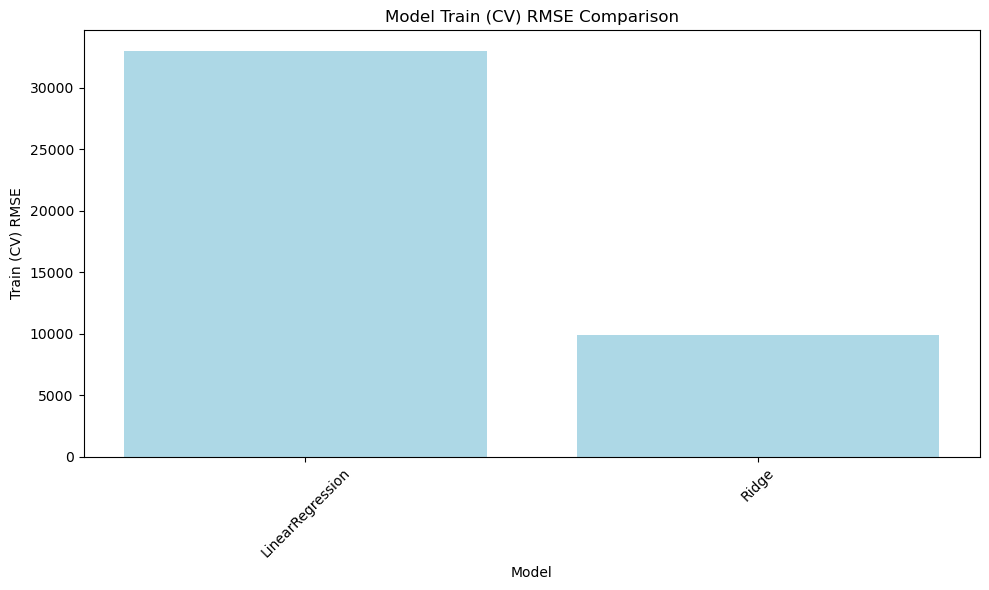

In [ ]:
from utils import train_models, analyze_and_visualize_model_performance
best_optimized_models = train_models(X_train=X_train, y_train=y_train, pipeline=pipeline, param_grid=param_grid)
analyze_and_visualize_model_performance(best_optimized_models)


Best Performance Comparison:
+------------------+-----------+------+-------------------------------------------------------------------------+
| Model            |      RMSE | R²   | Params                                                                  |
+==================+===========+======+=========================================================================+
| LinearRegression | 7562.5746 | N/A  | {'model': LinearRegression(), 'poly__degree': 2}                        |
+------------------+-----------+------+-------------------------------------------------------------------------+
| Ridge            | 7375.3830 | N/A  | {'model': Ridge(alpha=100.0), 'model__alpha': 100.0, 'poly__degree': 2} |
+------------------+-----------+------+-------------------------------------------------------------------------+


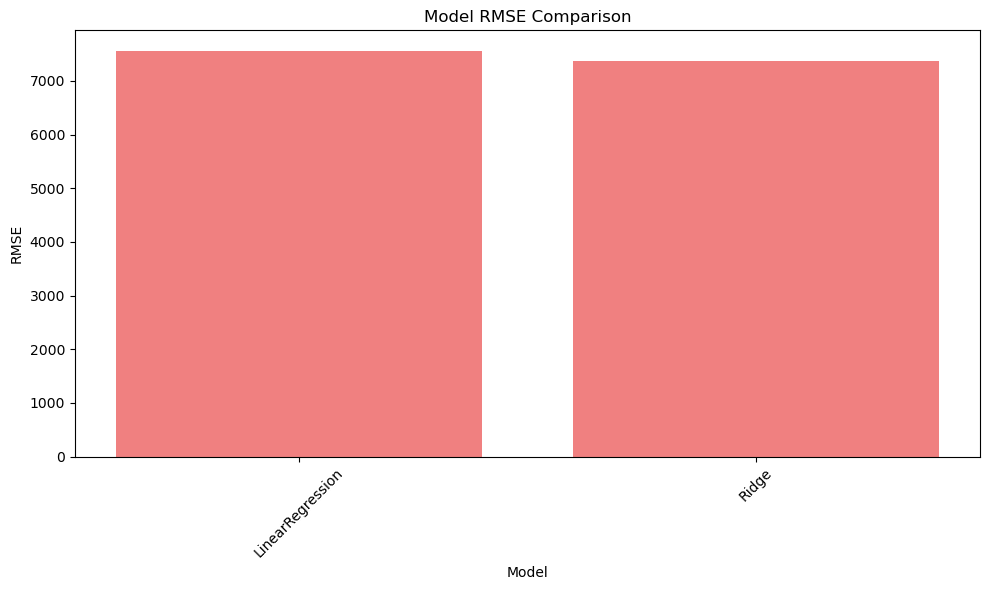

In [ ]:
analyze_and_visualize_model_performance(best_optimized_models)


Best Performance Comparison:
+------------------+-----------+--------+-------------------------------------------------------------------------+
| Model            |      RMSE |     R² | Params                                                                  |
+==================+===========+========+=========================================================================+
| LinearRegression | 7251.5412 | 0.7161 | {'model': LinearRegression(), 'poly__degree': 3}                        |
+------------------+-----------+--------+-------------------------------------------------------------------------+
| Ridge            | 7251.5412 | 0.7161 | {'model': Ridge(alpha=100.0), 'model__alpha': 100.0, 'poly__degree': 2} |
+------------------+-----------+--------+-------------------------------------------------------------------------+


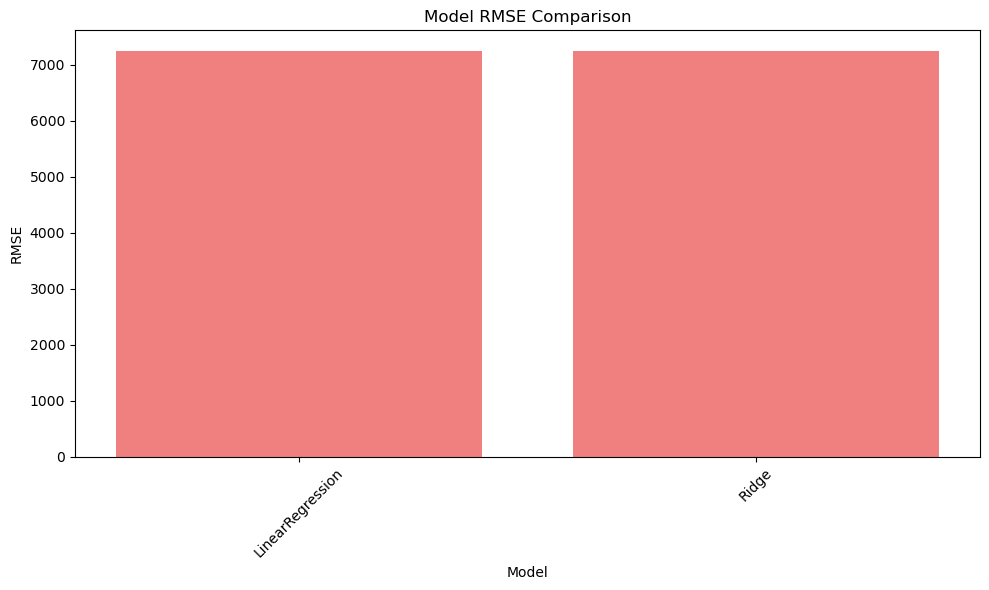

In [ ]:
from utils import analyze_and_visualize_model_performances
analyze_and_visualize_model_performances(best_models=best_optimized_models, X=X_test, y=y_test)



Best Performance Comparison:
+------------------+-----------+--------+-------------------------------------------------------------------------+
| Model            |      RMSE |     R² | Params                                                                  |
+==================+===========+========+=========================================================================+
| LinearRegression | 7052.7496 | 0.7329 | {'model': LinearRegression(), 'poly__degree': 3}                        |
+------------------+-----------+--------+-------------------------------------------------------------------------+
| Ridge            | 7052.7496 | 0.7329 | {'model': Ridge(alpha=100.0), 'model__alpha': 100.0, 'poly__degree': 2} |
+------------------+-----------+--------+-------------------------------------------------------------------------+


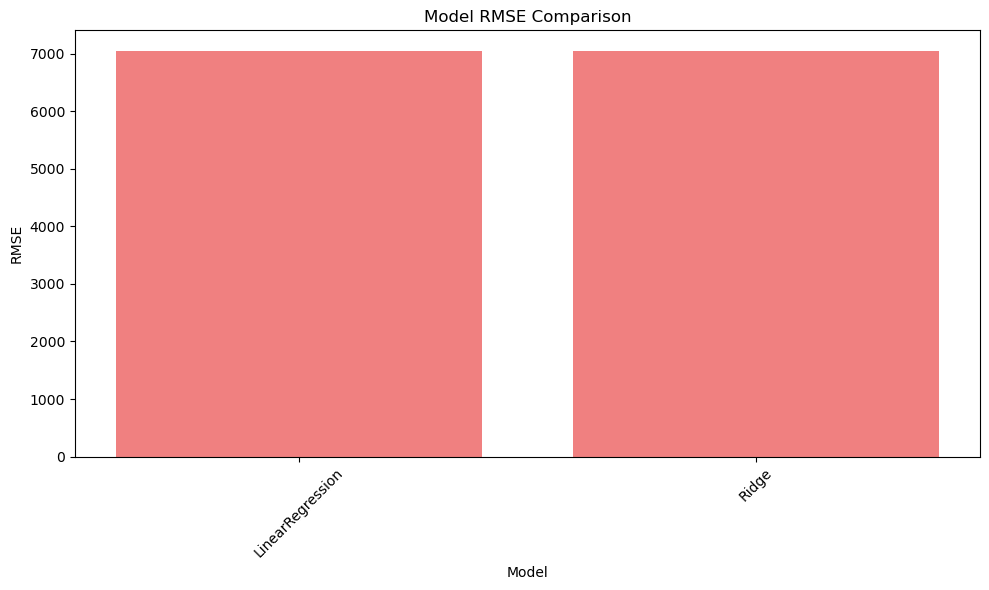

In [ ]:
from utils import analyze_and_visualize_model_performances
analyze_and_visualize_model_performances(best_models=best_optimized_models, X=X_train, y=y_train)
